In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)



In [48]:
# View all of the classes that automap found
class_names = Base.classes.keys()
class_names

['measurement', 'station']

In [49]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
#most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
# session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

<Axes: xlabel='Date', ylabel='Inches'>

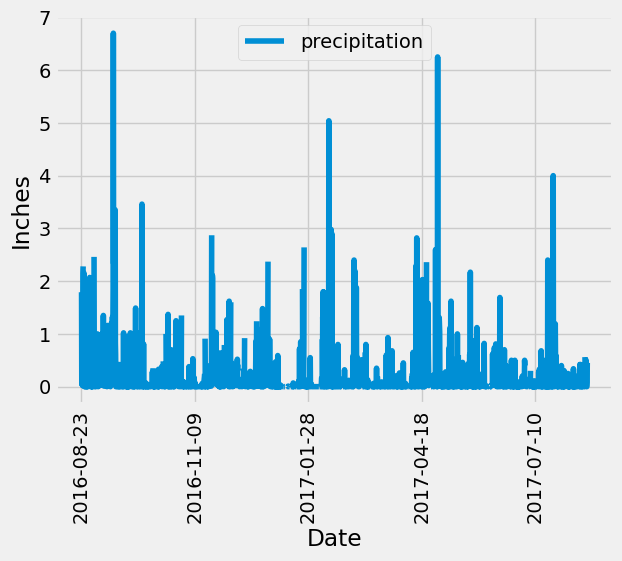

In [53]:
#  Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
Year_precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Year_precipitation_df = pd.DataFrame(Year_precipitation, columns=['date', 'precipitation'])

# Sort the dataframe by date
Year_precipitation_df = Year_precipitation_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
Year_precipitation_df.plot(x='date', y='precipitation', rot=90, xlabel='Date', ylabel='Inches')



In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
Year_precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, 
                            func.count(measurement.station))\
                            .group_by(measurement.station)\
                            .order_by(func.count(measurement.station).desc())\
                            .all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active[0][0]

session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_station_id)\
    .one()

(54.0, 85.0, 71.66378066378067)

<Axes: xlabel='Temperature', ylabel='Frequency'>

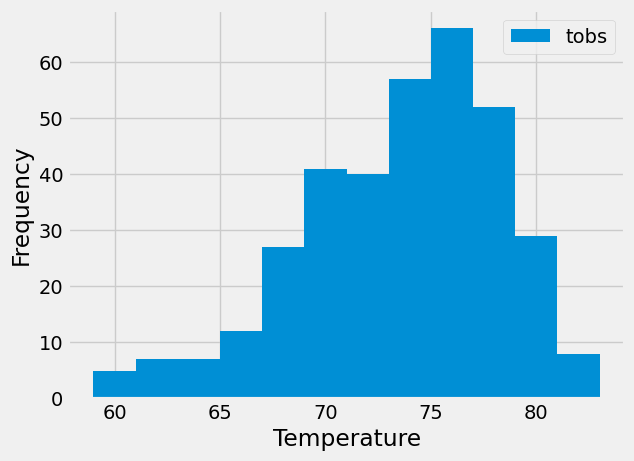

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_most_active = session.query(measurement.tobs)\
                        .filter(measurement.station == most_active_station_id)\
                        .filter(measurement.date >= last_year)\
                        .all()
year_most_active_df = pd.DataFrame(year_most_active, columns=['tobs'])
year_most_active_df.plot.hist(bins=12, xlabel='Temperature', ylabel='Frequency')


# Close Session

In [42]:
# Close Session
session.close()